<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carla Guzmán
- Nombre de alumno 2: Paola Silva


### **Link de repositorio de GitHub:** `https://github.com/Paito249/MDS7202`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Universidad/Lab_datos/Lab_06'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle(f"{path}/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

###  **Descripción del dataset**


1.   Invoice (category): N° factura de la compra.
2.   Stockcode (category): Código del producto.
3.   Description (object): Descripción del producto.
4.   Quantity (int64): Cantidad de productos en la compra.
5.   InvoiceDate(datetime64[ns]): Fecha y hora de la compra. Formato aaaa-mm-dd hh:mm:ss.
6.   Price (float64): Precio del producto.
7.   Customer ID (category): Id del cliente.
8.   Country (object): País de la compra


In [5]:
columns=df_retail.columns

In [6]:
columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

## 1.2 Análisis Explotatorio de los Datos [0.5 puntos]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable consta de examinar una sola variable a la vez, con el fin de comprender su distribución y características. Por otra parte, el análisis multivariable permite explorar relaciones y patrones entre múltiples variables simultáneamente. Finalmente,
análisis de datos faltantes permite definir que datos faltan y como gestionarlos, lo que proporciona información valiosa en la toma de decisiones, por ejemplo permite evaluar si la falta de datos puede afectar los resultados y determinar si es necesario o conveniente eliminar esas observaciones nulas.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie.

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [7]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )

    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [8]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Al hacer el análisis de la serie 'Price' es posible encontrar valores extraños al tratarse de precios, por ejemplo, se observa que existen 3 valores negativos y 3.687 ceros.

Además, se puede ver que la gran mayoría de los datos (75%) se encuentra bajo los 4,21 y que el máximo precio existente es 25.111.

Al observar el gráfico sin outlier podemos notar que distribuye parecido a una normal.



---





In [9]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Al hacer el análisis de la serie 'Invoice' se pueden observar 28.816 valores únicos.

En el gráfico de las 100 categorías más comúnes se observa que estas compras implicaron comprar sobre 256 articulos diferentes, observandose que la compra peak implico 675 articulos.

---



In [10]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Al hacer el análisis de la serie 'Stockcode', si se asume que cada articulo posee su propio codigo se pueden observar 4.632 diferentes vendidos (en distintas cantidades).

En el gráfico del top 100 se observa que el artículo con código 85123A fue vendido 3.516 veces. Los demás articulos no fueron vendidos más de 2.221 veces por lo que se observa una gran diferencia del articulo más vendido versus el resto del set de articulos.

---



In [11]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Al observar el análisis de la serie 'Description', se puede observar 4.682 descripciones de productos, donde el producto que más se repite con una frecuencia 3.549 es WHITE HANGING HEART T-LIGHT HOLDER. Seguido por 2.928 nan, por lo que dichos productos no poseen una etiqueta.


---

In [12]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Al analizar la serie 'Quantity', es posible notar que existen valores negativos en ambos gráficos, sin outliers y con outliers, llegando al 2, 35% de la serie original. Una posible explicación a estos valores podrían ser devoluciones, pero faltan antecedentes para poder conocer si este es el motivo o hay alguna otra explicación.

Se puede observar que la distribución no es uniforme, pero se tiene que el 75% de los datos es menor a 10.

---

In [13]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Al visualizar la serie 'InvoiceDate', se puede observar que la serie comprende un año de historial transaccional, entre el 01 de diciembre del 2009  (2009-12-01 07:45:00) al 09 de diciembre del 2010 (2010-12-09 20:01:00).

Con este historial es posible ver el comportamiento de compras durante un año, en el gráfico por ejemplo se puede observar un aumento en el último trimestre del 2010, atribuible a festividades como navidad.

---

In [14]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Al visualizar la serie 'Customer ID', se puede notar que existen 4.383 clientes identificados. Donde el top es el cliente 14911 que tiene una frecuencia de compra de 5710 dentro del set de datos. Es destacable que los 3 primeros usuarios poseen una frecuencia mayor a 3.000.

Además, se puede observar la gran cantidad de valores perdidos, ya que las celdas alcanzan 107.927 correspondiente al 20.54 % de la serie.

---

In [15]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Al visualizar la serie 'Country', se puede notar que hay registros de compras en 40 países, sin embargo la gran mayoría de estas fueron de UK llegando a 485.852 lo que corresponde a más del 90% del set.

A pesar de que UK contiene la gran mayoria de transacciones; Netherlands, France, Germany y EIRE tienen cantidades superiores a 2.500 transacciones.

---

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [16]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)


    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i])
            plt.ylabel(list_type[j])
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

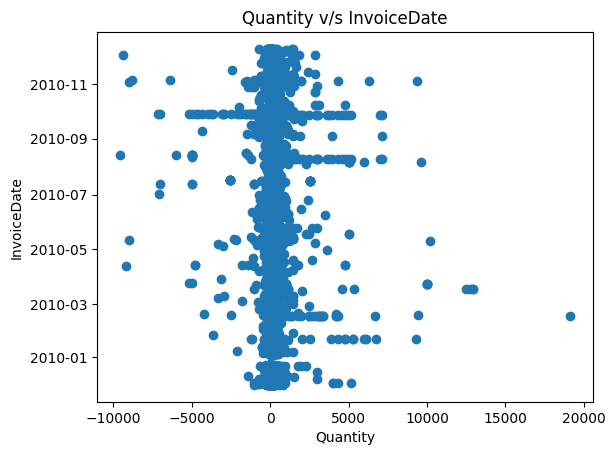

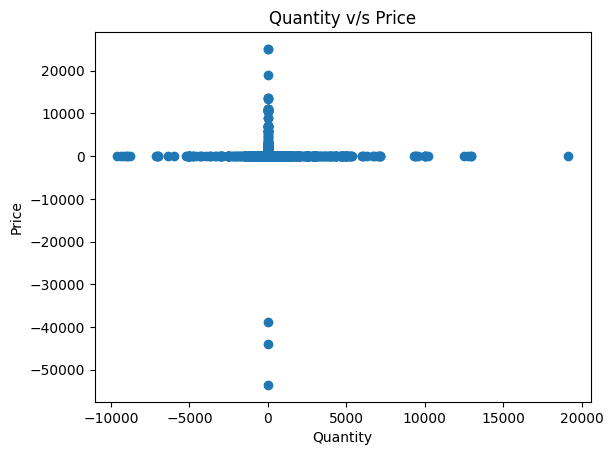

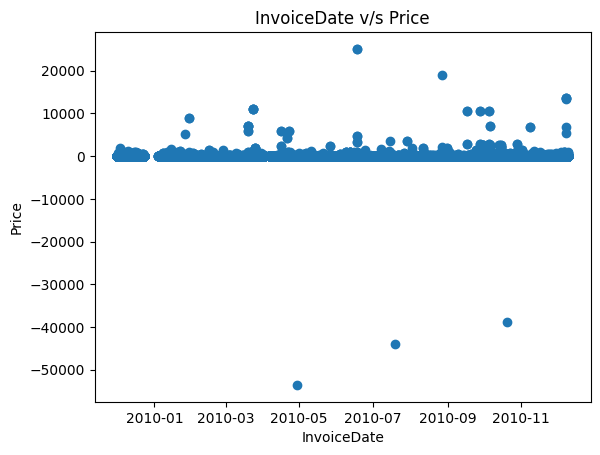

## Correlation:

<ipython-input-16-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

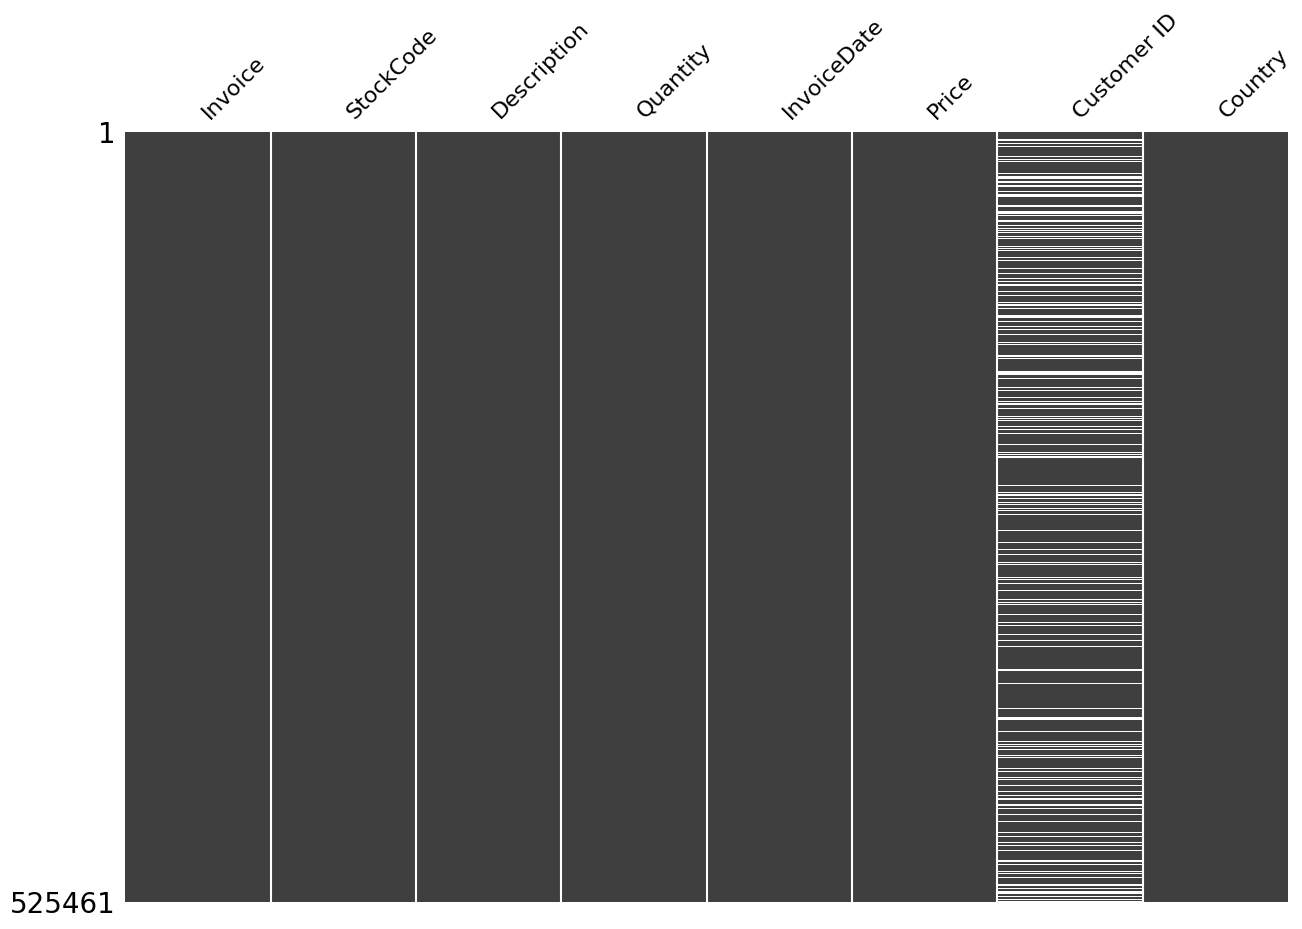

In [18]:
profile_df(df_retail)

#### **Quantity vs InvoiceDate**

> Se observa en general un comportamiento de compra consistente a lo analizado anteriormente, donde la mayoría de las compras eran de cantidades inferiores a 10.

> Es posible notar hartos valores negativos, especialmente en el mes de octubre. Además, de peaks de transacciones observables en febrero, agosto y octubre, donde pueden influir distintos factores como épocas escolares (retorno a clases en UK en marzo) o campañas de marketing como cybers u otros. De manera que por ejemplo en octubre se observan transacciones dentro del rango -5.000 a 5000 y outliers en febrero con compras cercanas a 20.000.


#### **Quantity vs Price**

> Se observa que la gran mayoria de precios se concentra en el eje del cero, lo que tiene sentido si son productos unitarios. Además, se observan valores de cantidad negativa que pueden ser devoluciones y precios negativos que podrían ser valores mal etiquetados.

> Se destaca que los outliers en precio conllevan poca cantidad, a su vez cantidades muy elevadas conllevan un precio cercano a 0.



#### **InvoiceDate vs Price**

> Se observa que existen 3 transacciones con precio negativo, cómo se hablo anteriormente podría ser alguna devolución realizada. En este caso se catalogan como outliers.

>Además, se observa que durante todo el año, los precios de compra se mantuvieron constantes. En su mayoria entre el rango de 0 y 5.000. Por otra parte, se observa que el top de venta fue de 25.111 realizada en junio del 2010.

#### **Correlación**

> No se presenta correlación entre los valores númericos del dataframe.

#### **Gráfico valores faltantes**

> Del gráfico de valores faltantes ("Missing Matriz") se observa que la serie "Customer ID" posee bastantes valores faltantes, cómo ya se había visualizado en el análisis univariable de dicha serie, los datos faltantes corresponden al 20.54 % de los datos. Además, no se observa en este gráfico, pero es importante mencionar que la columna "Description" posee 2.928 valores etiquetados como "nan" (NaN).


### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [31]:
def limpieza_df(dataframe_in):
  # Se genera copia para evitar cualquier problema con el dataset original
  df=dataframe_in.copy()

  # Valores perdidos en serie "Customer ID"
  df = df.dropna(subset=['Customer ID'])

  # Compras con precio positivo
  df = df[df['Price']>0]

  # Compras con cantidad positiva, ie >1
  df = df[df['Quantity']>1]

  # Para eliminar outliers se va a calcular el z_score que calcula que tantas desviaciones standar esta un determinado valor de la media. Se acepta como máximo a 3 desviaciones estandar.
  ## Z_score para price
  z_score_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()
  ## Filtrar df por los outliers de price
  df = df[abs(z_score_price) <= 3]

  ## Z_score para Quantity
  z_score_quantity = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()
  ## Filtrar df por los outliers de price
  df = df[abs(z_score_quantity) <= 3]

  return df

In [32]:
df_limpio= limpieza_df(df_retail)

In [35]:
print(f'Las dimensiones del df original son: {df_retail.shape}')
print(f'Las dimensiones del df limpio son: {df_limpio.shape}')

Las dimensiones del df original son: (525461, 8)
Las dimensiones del df limpio son: (321444, 8)


## Bivariant Analysis:

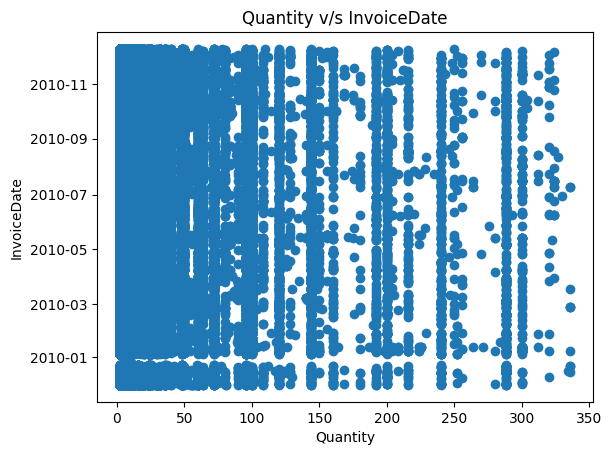

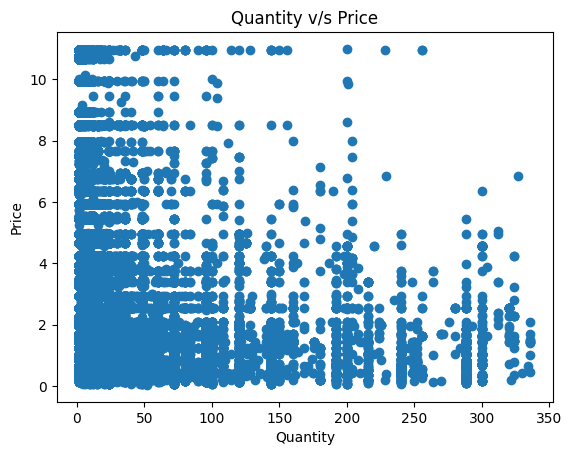

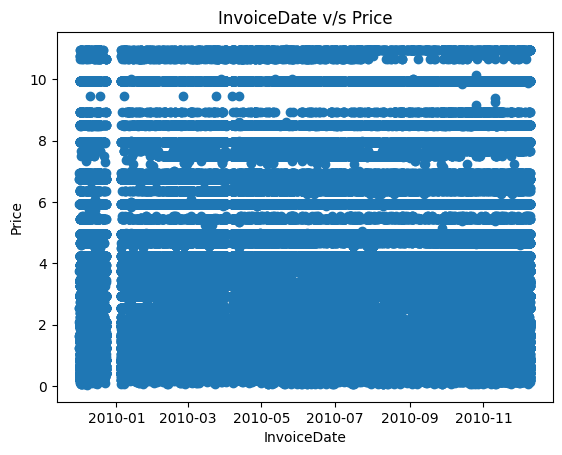

## Correlation:

<ipython-input-16-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

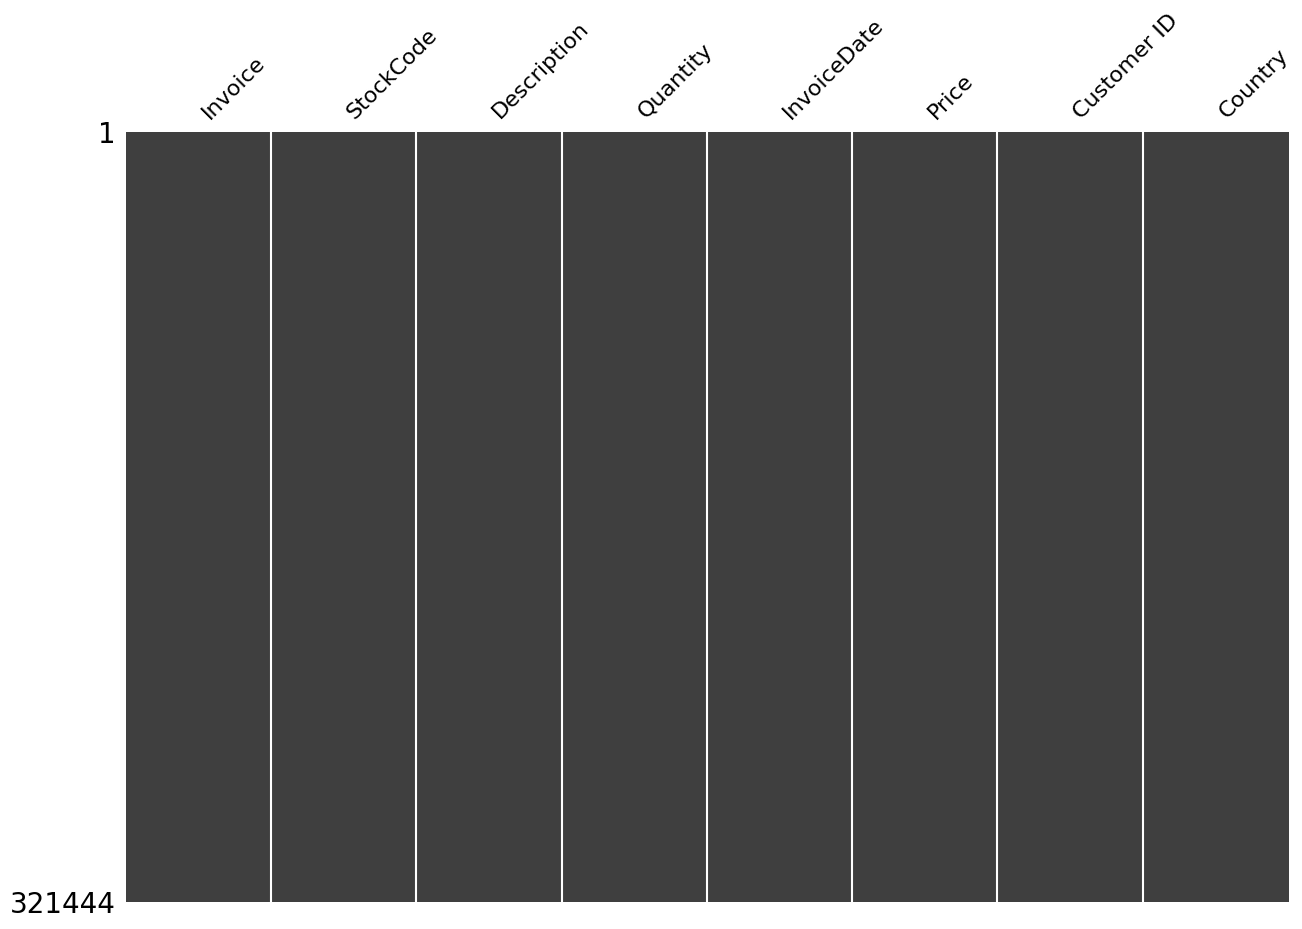

In [33]:
profile_df(df_limpio)



> En primer lugar, se observa que luego de la limpieza se eliminaron 204.017 datos, quedando con un largo de 321.444.

> Ya no existen valores nulos en la columna "Customer ID" en el gráfico de valores pérdidos.

> Además, se observa que los valores de los gráficos son más variados, ya que no existe la presencia de outliers que afecten a los ejes.

> Finalmente, en la matriz de correlación se presenta una correlación negativa entre precio y cantidad. Permitiendo relacionar que entre mayor sean los precios hay menor cantidad de transacciones.



### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [39]:
# Se genera copia para evitar cualquier problema con el dataset limpio
df=df_limpio.copy()
# Ganancia es la cantidad x precio
df['Ganancia'] = df['Quantity']*df['Price']
# agrupar por descripcion
df_description = df[['Description','Quantity','Ganancia']].groupby('Description').sum()


# 30 productos con mayores ganancias
fig_1 = px.bar(
    df_description.sort_values(by='Ganancia', ascending=False).iloc[:30],
    x=df_description.sort_values(by='Ganancia', ascending=False).iloc[:30].index,
    y='Ganancia',
    title='Top 30 productos con mayores ganancias',)

# 30 productos con mayores cantidades vendidas
fig_2 = px.bar(
    df_description.sort_values(by='Quantity', ascending=False).iloc[:30],
    x=df_description.sort_values(by='Quantity', ascending=False).iloc[:30].index,
    y='Quantity',
    title='Top 30 productos con mayores cantidades vendidas',)

# Mostrar gráficos
fig_1.show()
fig_2.show()


> Se observa que el producto más vendido no es el que genera más ganancia, si no que es el segundo que más genera. Por otra parte, el producto que más genera ganancia no se encuentra en el top de más vendidos.

>Por lo que, no necesariamente los articulos que más generan ganancia son los articulos más vendidos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

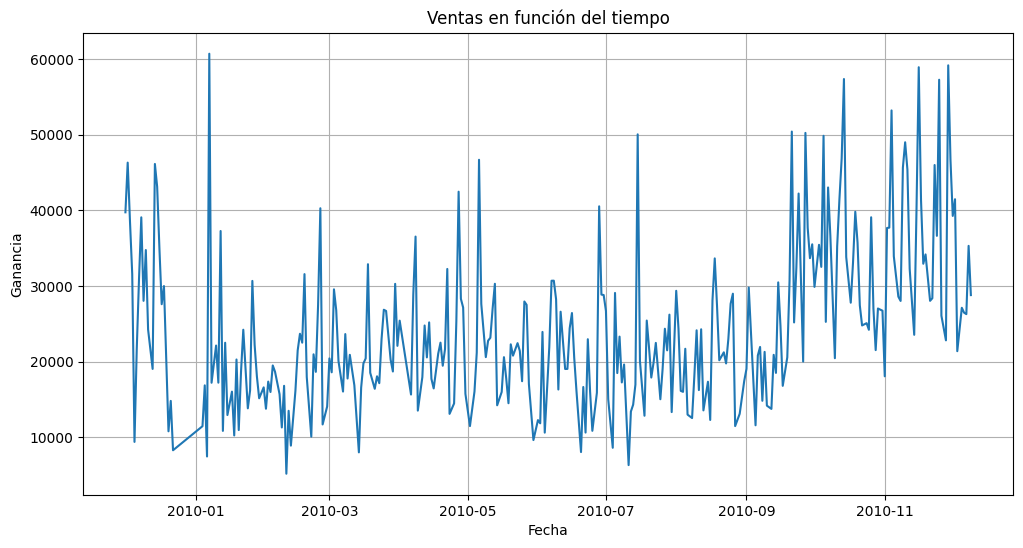

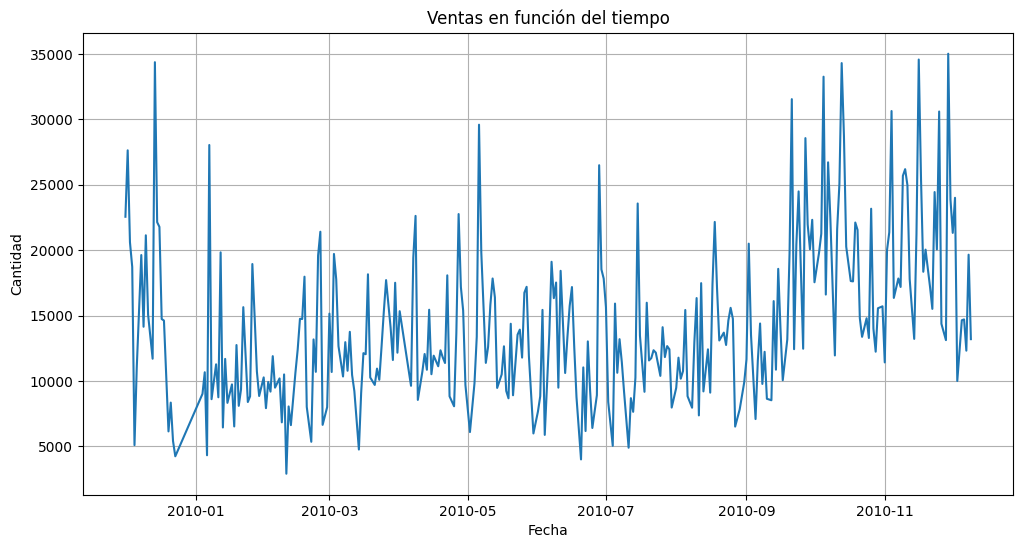

In [49]:
def plot_ventas(dataframe):
    # Se genera copia para evitar cualquier problema con el dataset original
    df=dataframe.copy()
    # Ganancia es la cantidad x precio
    df['Ganancia'] = df['Quantity']*df['Price']
    # Convertir la columna 'InvoiceDate' a tipo de dato datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    # agrupar por fecha
    df_fecha = df.groupby(df['InvoiceDate'].dt.date)[['Ganancia', 'Quantity']].sum()

    # Grafico ganancias en función del tiempo
    plt.figure(figsize=(12, 6))
    plt.plot(df_fecha.index, df_fecha['Ganancia'], label='Ganancias')
    plt.title('Ventas en función del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Ganancia')
    plt.grid(True)
    plt.show()

    fig_1 = px.bar(
    df_fecha,
    y='Ganancia',
    title='Ganancias en el tiempo',)
    fig_1.show()

    #Grafico cantidad en función del tiempo
    plt.figure(figsize=(12, 6))
    plt.plot(df_fecha.index, df_fecha['Quantity'], label='Cantidad')
    plt.title('Ventas en función del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.show()

    fig_2 = px.bar(
    df_fecha,
    y='Quantity',
    title='Cantidad en el tiempo',)
    fig_1.show()
plot_ventas(df_limpio)


>Es posible observar que a finales de diciembre del 2009 y a principios de abril 2010, no se efectuaron transacciones.

>En general se observa que el primer día de la semana hay menores ventas y que las ganancias percibidas tambien son menores. Además, se observa que en fines de semana no ocurren transacciones.

>Por otra parte, es posible notar que en el último trimestre del 2010 el volumen de compras es mayor y las ganancias también, atribuibles a la festividades ocurridas en este periodo.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>